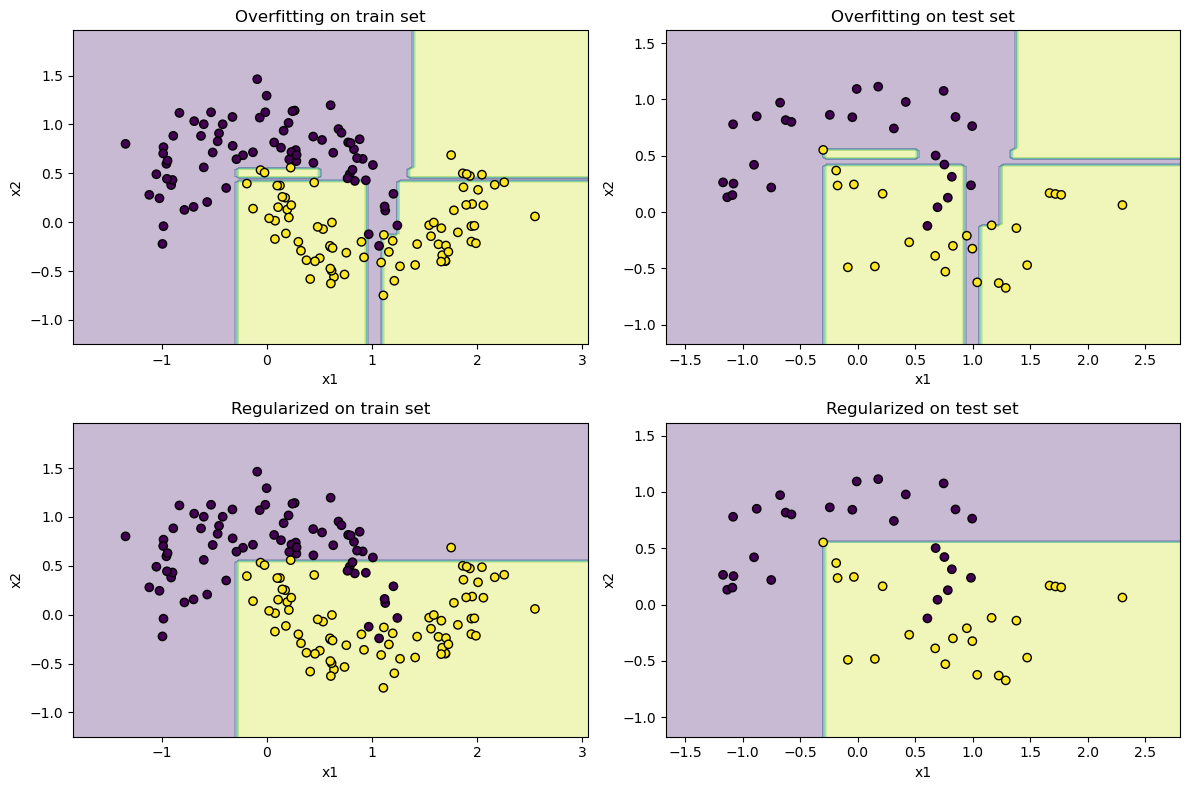

Overfitting classifier:
Train accuracy: 1.0
Test accuracy: 0.82
Regularized classifier:
Train accuracy: 0.92
Test accuracy: 0.84


In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# Create a synthetic dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=10)

# Split the dataset into train and test sets
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

# Define a function to plot the decision boundary and the data points
def plot_decision_boundary(clf, X, y, title):
    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the class labels for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a contour plot
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot the data points with different colors for each class
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    # Add some labels and a title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)

# Create a decision tree classifier with no restrictions (prone to overfitting)
clf_overfit = DecisionTreeClassifier(random_state=42)
clf_overfit.fit(X_train, y_train)

# Create a decision tree classifier with some restrictions (less prone to overfitting)
clf_regularized = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=10)
clf_regularized.fit(X_train, y_train)

# Plot the decision boundaries for both classifiers on the train and test sets
plt.figure(figsize=(12, 8))
plt.subplot(221)
plot_decision_boundary(clf_overfit, X_train, y_train, 'Overfitting on train set')
plt.subplot(222)
plot_decision_boundary(clf_overfit, X_test, y_test, 'Overfitting on test set')
plt.subplot(223)
plot_decision_boundary(clf_regularized, X_train, y_train, 'Regularized on train set')
plt.subplot(224)
plot_decision_boundary(clf_regularized, X_test, y_test, 'Regularized on test set')
plt.tight_layout()
plt.show()

# Print the accuracy scores for both classifiers on the train and test sets
print('Overfitting classifier:')
print('Train accuracy:', clf_overfit.score(X_train, y_train))
print('Test accuracy:', clf_overfit.score(X_test, y_test))
print('Regularized classifier:')
print('Train accuracy:', clf_regularized.score(X_train, y_train))
print('Test accuracy:', clf_regularized.score(X_test, y_test))
